### Baseline Notebook
In this notebook we train a basic linear regression model on our dataset. The goal of this notebook is to generate a baseline for the performance of our CNN.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load the dataset

In [2]:
image_datagen = ImageDataGenerator(validation_split=0.15, rescale=1.0/255)
train_generator = image_datagen.flow_from_directory('../data/', target_size=(150, 150), batch_size=16, subset="training")
valid_generator = image_datagen.flow_from_directory('../data/', target_size=(150, 150), batch_size=16, subset="validation")

Found 5211 images belonging to 41 classes.
Found 897 images belonging to 41 classes.


### Define linear regression model
The model consists of a flatten layer and one fully connected dense layer.

In [5]:
# Initialize a Keras sequential model
model=keras.models.Sequential()     
model.add(layers.Flatten(input_shape=(150,150,3))) 
model.add(layers.Dense(41))
model.build()

# output a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 41)                2767541   
Total params: 2,767,541
Trainable params: 2,767,541
Non-trainable params: 0
_________________________________________________________________


Train basic linear regression model for 10 epochs using SGD as the optimizer and MSE as the loss.

In [6]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

history = model.fit(train_generator, validation_data=valid_generator, epochs=10, steps_per_epoch=5211/32, validation_steps=897/32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 162.84375 steps, validate for 28.03125 steps
Epoch 1/10
163/162 [==============================] - 30s 182ms/step - loss: 0.1100 - accuracy: 0.0479 - val_loss: 0.0753 - val_accuracy: 0.0905
Epoch 2/10
163/162 [==============================] - 29s 177ms/step - loss: 0.0839 - accuracy: 0.0798 - val_loss: 0.0614 - val_accuracy: 0.1078
Epoch 3/10
163/162 [==============================] - 29s 176ms/step - loss: 0.0699 - accuracy: 0.1060 - val_loss: 0.0859 - val_accuracy: 0.1034
Epoch 4/10
163/162 [==============================] - 30s 182ms/step - loss: 0.0699 - accuracy: 0.1051 - val_loss: 0.0673 - val_accuracy: 0.0797
Epoch 5/10
163/162 [==============================] - 29s 178ms/step - loss: 0.0610 - accuracy: 0.1380 - val_loss: 0.0748 - val_accuracy: 0.0970
Epoch 6/10
163/162 [==============================] - 29s 175ms/step - loss: 0.0644 - accuracy: 0.1398 - val_loss: 0.0702 - val_accuracy: 0.0776
Epoch 7/10
163/162 [=====

Plot model train accuracy and validation accuracy.

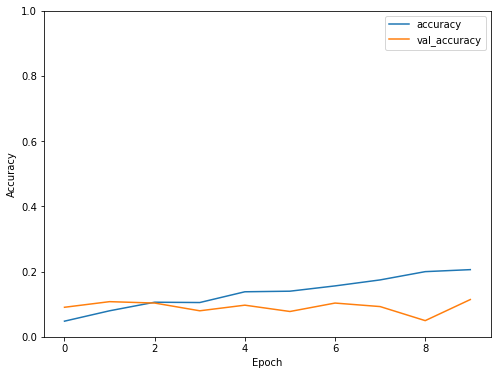

In [7]:
# Example of plotting training and validation accuracy vs epoch
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

Given how small our dataset is and the fact that the images vary greatly, we are pretty impressed with the performance of the simple linear regression model. It performs almost 3 times better than random.

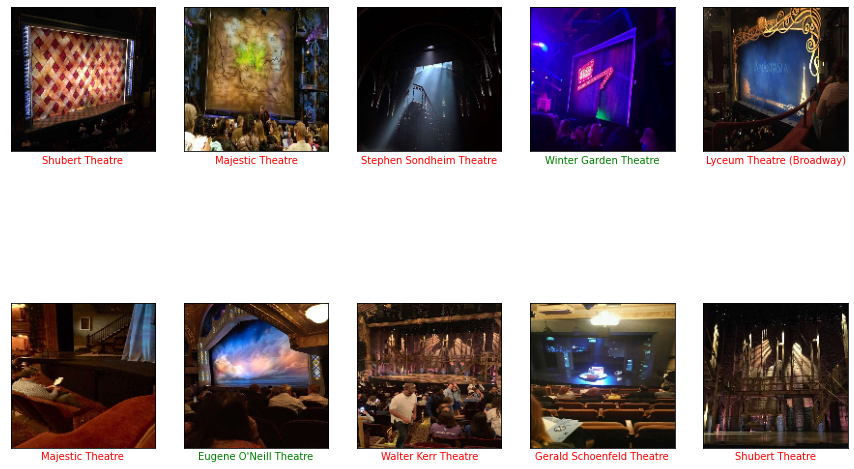

In [9]:
import plotting_util

valid_examples = valid_generator.next()

classifications = []

for im in valid_examples[0]:
    im_reshaped = tf.reshape(im, [-1, 150, 150, 3])
    one_hot = np.zeros((42))
    one_hot[np.argmax(model.predict(im_reshaped))] = 1
    classifications.append(one_hot)

plotting_util.plot_classification_examples(classifications,valid_examples[1],valid_examples[0])